In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gc

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Road Safety

### Autor: Plamen Vasilev

##  Abstract

Road traffic crashes are the world’s leading cause of death for children and young adults 5–29 years of age. Road traffic injuries result in as many as 50 million injuries per year—which exceeds the combined population of the world’s two largest cities.

Throughout the world, roads are shared by cars, buses, trucks, motorcycles, mopeds, pedestrians, animals, taxis, and other travelers. Travel made possible by motor vehicles supports economic and social development in many countries. Yet each year, these vehicles are involved in crashes that are responsible for 1.35 million deaths and up to 50 million injuries. 

Just consider that 1.35 million deaths are more than global pandemic we have had for almost one year, that let the wolrd to economic crisis eaqual to Drop in GDP as a post World war time, so it is paramount to make efford to study this subject and hopefuly have answers that will reduce those death on the road.

With our work we will try to make a really small contribution to help road safety.

### Content:

1. Introduction 
2. Get Data
3. Pepair the data for modeling.
4. Classification on the whole data.
    1. Logistic Regression
    2. Desision Trees
    3. Random Forest
    4. Support Vector Machines
    5. Dimensionality reduction - PCA
    6. Clustering
    7. SVM with PCA
5. Classification with Under Sampling
    1. Undersample the data
    2. PCA with undersampling
    3. Logistic regression with PCA and undersampling
    4. Decicion Tree with PCA and undersampling
    5. Random Forest with PCA and undersampling
    6. Support Vector Machines with PCA and undersampling
    7. Gausian SVM with PCA and undersampling
6. Test the best model
7. Conclusion
8. References

## 1. Introduction

The goal of our work is to try to **separate the road accident by their severity using a ML algorithm**, so that it will **remove that human bias**. Why is that important in my view ?

Allmost everywhere you hear a news for road accident, the reporter will say how severe it is, well we have some idea what light accidnt is (maybe no police and some scraches on the vehicle), what medium (mayble some scraches on the person and severe on the vehicle) or what havy accident(maybe severe damage on the person) is, but this is subjective, **Can we make if objective ? Can we make it automated ?**, those are the question we will try to answer here.

One more question **Why !?, What will be the benefit of the aotomation !?**.

Well by my opinion if a govenment or car manufacturer have an **unbias** information for different kind of accident, get the data and see that for instance, a car accidents with medium severity in the data happen with, a feature that had realy hight values maybe 90% are in weather conditions, like fog or rain etc., in spesific location maybe, a goverment can issue rules to lower the speed there, if those accidents happen globaly, car manufacturer maybe increce the power of a fog lights or they can be pointed maybe just a bit lower to not blind the other cars etc. Eventualy those kind of measure can lower car accidents and save lives. Of course this is realy complicated issue and will take tons of resources, we will just try to make s tiny step of trying to automate the classification of car accidents based on data we have for the first half of this year (2020), so havy accidents New York and Iowa are the same thing and base on that people in power can make better decisions preventing them. 

#### Our goal is to predict corectly at least every 4 of 5 Accidents.

But beffore we start with everthing we will start a time so to get ourself information how much time the paper needs to finsh, becoause time is realy important reasurce and if our models take too much of it we will need to fix them or if this do not work we will skip some, ofr that we will start a timer in a cell below.

In [3]:
start_time_total = time.time()

## 2. Get data

Our data come from: **https://www.kaggle.com/sobhanmoosavi/us-accidents**.

*(to run the notebook yourself you need to download the CSV file from https://www.kaggle.com/sobhanmoosavi/us-accidents unzip it and put the file in data named folder)*

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.

Now we reed the data

In [4]:
accidents_info_all = pd.read_csv("data/US_Accidents_June20.csv")

In [5]:
accidents_info_all

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


### Content

0.	Attribute -	Description	
1.	ID - This is a unique identifier of the accident record.
2.	Source	- Indicates source of the accident report (i.e. the API which reported the accident.).
3.	TMC	- A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.	
4.	Severity	 - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).	
5.	Start_Time	- Shows start time of the accident in local time zone.	
6.	End_Time	- Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.	
7.	Start_Lat	- Shows latitude in GPS coordinate of the start point.	
8.	Start_Lng	 - Shows longitude in GPS coordinate of the start point.	
9.	End_Lat	- Shows latitude in GPS coordinate of the end point.	
10.	End_Lng	- Shows longitude in GPS coordinate of the end point.	
11.	Distance(mi)	- The length of the road extent affected by the accident.	
12.	Description	- Shows natural language description of the accident.	
13.	Number	- Shows the street number in address field.	
14.	Street	- Shows the street name in address field.	
15.	Side	- Shows the relative side of the street (Right/Left) in address field.	
16.	City	- Shows the city in address field.	
17.	County	- Shows the county in address field.	
18.	State	- Shows the state in address field.	
19.	Zipcode	- Shows the zipcode in address field.	
20.	Country	- Shows the country in address field.	
21.	Timezone	- Shows timezone based on the location of the accident (eastern, central, etc.).	
22.	Airport_Code	- Denotes an airport-based weather station which is the closest one to location of the accident.	Yes
23.	Weather_Timestamp	- Shows the time-stamp of weather observation record (in local time).
24.	Temperature(F)	- Shows the temperature (in Fahrenheit).	
25.	Wind_Chill(F)	- Shows the wind chill (in Fahrenheit).	
26.	Humidity(%)	- Shows the humidity (in percentage).	
27.	Pressure(in)	- Shows the air pressure (in inches).	
28.	Visibility(mi)	- Shows visibility (in miles).	
29.	Wind_Direction	- Shows wind direction.	
30.	Wind_Speed(mph)	- Shows wind speed (in miles per hour).	
31.	Precipitation(in)	- Shows precipitation amount in inches, if there is any.	
32.	Weather_Condition	- Shows the weather condition (rain, snow, thunderstorm, fog, etc.)	
33.	Amenity	- A POI annotation which indicates presence of amenity in a nearby location.	
34.	Bump	- A POI annotation which indicates presence of speed bump or hump in a nearby location.	
35.	Crossing	- A POI annotation which indicates presence of crossing in a nearby location.	
36.	Give_Way	- A POI annotation which indicates presence of give_way in a nearby location.	
37.	Junction	- A POI annotation which indicates presence of junction in a nearby location.	
38.	No_Exit	- A POI annotation which indicates presence of no_exit in a nearby location.	
39.	Railway	- A POI annotation which indicates presence of railway in a nearby location.	
40.	Roundabout	- A POI annotation which indicates presence of roundabout in a nearby location.	
41.	Station	- A POI annotation which indicates presence of station in a nearby location.	
42.	Stop	- A POI annotation which indicates presence of stop in a nearby location.	
43.	Traffic_Calming	- A POI annotation which indicates presence of traffic_calming in a nearby location.	
44.	Traffic_Signal	- A POI annotation which indicates presence of traffic_signal in a nearby location.	
45.	Turning_Loop	- A POI annotation which indicates presence of turning_loop in a nearby location.
46.	Sunrise_Sunset	- Shows the period of day (i.e. day or night) based on sunrise/sunset.	
47.	Civil_Twilight	- Shows the period of day (i.e. day or night) based on civil twilight.	
48.	Nautical_Twilight	- Shows the period of day (i.e. day or night) based on nautical twilight.	
49.	Astronomical_Twilight	- Shows the period of day (i.e. day or night) based on astronomical twilight.

## 3. Pepair the data for modeling.

After first look at it it seams there are some columns that need to be added, it is a good idea to have the duration of the accident, time of an accident and maybe maybe month, so we will transfor the data in  Start_Time and End_Time column. Since the data set is too large is takes 3 GB from my computers memory just to read it we will take just the accidents from 2020 and for that we will need and Accident year column so we can filter just those.

In [6]:
datetime_variables = ["Start_Time"]

In [7]:
datetime_variables_processed = pd.DataFrame()
for datetime_variable in datetime_variables:
    date = pd.to_datetime(accidents_info_all[datetime_variable])
    datetime_variables_processed["Accident_year"] = date.dt.year
    datetime_variables_processed["Accident_month"] = date.dt.month
    datetime_variables_processed["Accident_hour"] = date.dt.hour
    datetime_variables_processed["Accident_start"] = date

In [8]:
for datetime_variable in datetime_variables:
    date = pd.to_datetime(accidents_info_all["End_Time"])
    datetime_variables_processed["Accident_end"] = date

In [9]:
for datetime_variable in datetime_variables:
    datetime_variables_processed["Accident_duraton"] = datetime_variables_processed["Accident_end"] - datetime_variables_processed["Accident_start"]
datetime_variables_processed["Accident_duraton"] = datetime_variables_processed["Accident_duraton"].astype('timedelta64[s]')    

In [10]:
datetime_variables_processed = datetime_variables_processed.drop(["Accident_start","Accident_end"], axis=1)
datetime_variables_processed.columns

Index(['Accident_year', 'Accident_month', 'Accident_hour', 'Accident_duraton'], dtype='object')

Well we have done it we have an accident month and hour we will print the arrays to be sure.

In [11]:
datetime_variables_processed["Accident_hour"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20,  4, 13,
       23, 21, 22,  0,  1,  2,  3], dtype=int64)

In [12]:
datetime_variables_processed["Accident_month"].unique()

array([ 2,  3,  6,  7,  8, 11, 12,  1, 10,  9,  4,  5], dtype=int64)

Next step is to merge those two new columns with the original dataset.

In [13]:
accidents_info_merged = pd.merge(left=accidents_info_all, right=datetime_variables_processed, left_on=accidents_info_all.index,
         right_on=datetime_variables_processed.index)

In [14]:
accidents_info_merged

,key_0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_year,Accident_month,Accident_hour,Accident_duraton
0,0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,...,False,False,Night,Night,Night,Night,2016,2,5,18840.0
1,1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,...,False,False,Night,Night,Night,Day,2016,2,6,1800.0
2,2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,...,True,False,Night,Night,Day,Day,2016,2,6,1800.0
3,3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,...,False,False,Night,Day,Day,Day,2016,2,7,1800.0
4,4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,...,True,False,Day,Day,Day,Day,2016,2,7,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,...,False,False,Day,Day,Day,Day,2019,8,18,1716.0
3513613,3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,...,False,False,Day,Day,Day,Day,2019,8,19,1613.0
3513614,3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,...,False,False,Day,Day,Day,Day,2019,8,19,1708.0
3513615,3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,...,False,False,Day,Day,Day,Day,2019,8,19,1761.0


Our RAM is half taken so we will delete the accidents_info_all and datetime_variables_processed data sets to release some memory.

In [15]:
del accidents_info_all

In [16]:
del datetime_variables_processed

In [17]:
accidents_info_merged.dtypes

key_0                      int64
ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed

Next as we said we will take just the Accidents form 2020.

In [18]:
accidents_info = accidents_info_merged[accidents_info_merged["Accident_year"] == 2020]

We will also delete the accidents_info_merged data set also to save rsources.

In [19]:
del accidents_info_merged

In [20]:
accidents_info.shape

(539187, 54)

We have droped 3000000 samples and we will work with "just" 540000. 

Lets look at the columns to see if we can remove some of them or transform others. 

In [21]:
accidents_info.dtypes

key_0                      int64
ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed

We have some bool columns in machine learning we don't need them as they are but with numerical values so we will make a transfomation from bool to int with values 1 and 0 representing true and false.

In [22]:
le = LabelEncoder()
le.fit(accidents_info["Amenity"])
accidents_info.loc[:, "Amenity"] = le.transform(accidents_info["Amenity"])
le.fit(accidents_info["Bump"])
accidents_info.loc[:, "Bump"] = le.transform(accidents_info["Bump"])
le.fit(accidents_info["Crossing"])
accidents_info.loc[:, "Crossing"] = le.transform(accidents_info["Crossing"])
le.fit( accidents_info["Give_Way"])
accidents_info.loc[:, "Give_Way"] = le.transform(accidents_info["Give_Way"])
le.fit( accidents_info["Junction"])
accidents_info.loc[:, "Junction"] = le.transform(accidents_info["Junction"])
le.fit(accidents_info["No_Exit"])
accidents_info.loc[:, "No_Exit"] = le.transform(accidents_info["No_Exit"])
le.fit(accidents_info["Railway"])
accidents_info.loc[:, "Railway"] = le.transform(accidents_info["Railway"])
le.fit(accidents_info["Roundabout"])
accidents_info.loc[:, "Roundabout"] = le.transform(accidents_info["Roundabout"])
le.fit(accidents_info["Station"])
accidents_info.loc[:, "Station"] = le.transform(accidents_info["Station"])
le.fit(accidents_info["Stop"])
accidents_info.loc[:, "Stop"] = le.transform(accidents_info["Stop"])
le.fit(accidents_info["Traffic_Calming"])
accidents_info.loc[:, "Traffic_Calming"] = le.transform(accidents_info["Traffic_Calming"])
le.fit( accidents_info["Traffic_Signal"])
accidents_info.loc[:, "Traffic_Signal"] = le.transform(accidents_info["Traffic_Signal"])
le.fit(accidents_info["Turning_Loop"])
accidents_info.loc[:, "Turning_Loop"] = le.transform(accidents_info["Turning_Loop"])

C:\Users\plamen\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [23]:
accidents_info.head()

,key_0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_year,Accident_month,Accident_hour,Accident_duraton
512224,512224,A-512230,MapQuest,201.0,3,2020-05-24 01:37:16,2020-05-24 02:06:05,42.932457,-78.766060,NaN,...,0,0,Night,Night,Night,Night,2020,5,1,1729.0
512225,512225,A-512231,MapQuest,201.0,2,2020-05-24 04:19:35,2020-05-24 05:03:27,43.005428,-78.948601,NaN,...,0,0,Night,Night,Night,Day,2020,5,4,2632.0
512226,512226,A-512232,MapQuest,201.0,2,2020-05-24 16:00:22,2020-05-24 17:17:57,42.744190,-78.842873,NaN,...,0,0,Day,Day,Day,Day,2020,5,16,4655.0
512227,512227,A-512233,MapQuest,201.0,2,2020-05-24 09:21:07,2020-05-24 09:50:36,42.013992,-70.726639,NaN,...,0,0,Day,Day,Day,Day,2020,5,9,1769.0
512228,512228,A-512234,MapQuest,201.0,3,2020-05-24 15:13:34,2020-05-24 15:43:04,42.380833,-71.076225,NaN,...,0,0,Day,Day,Day,Day,2020,5,15,1770.0


It worked now lets see the sring columns how many unique values they have so we can decide if keep them for training or they are just too much for our hardware.

In [24]:
print(f"Countries: {len(accidents_info['Country'].unique())}")
print(f"Descriptions: {len(accidents_info['Description'].unique())}")
print(f"Str. Numbers: {len(accidents_info['Number'].unique())}")
print(f"Street: {len(accidents_info['Street'].unique())}")
print(f"Side: {len(accidents_info['Side'].unique())}")
print(f"City: {len(accidents_info['City'].unique())}")
print(f"State: {len(accidents_info['State'].unique())}")
print(f"Zipcode: {len(accidents_info['Zipcode'].unique())}")
print(f"Timezone: {len(accidents_info['Timezone'].unique())}")
print(f"Airport_Code: {len(accidents_info['Airport_Code'].unique())}")
print(f"Weather_Timestamp: {len(accidents_info['Weather_Timestamp'].unique())}")
print(f"Wind_Direction: {len(accidents_info['Wind_Direction'].unique())}")
print(f"Weather_Condition: {len(accidents_info['Weather_Condition'].unique())}")
accidents_info.columns

Countries: 1
Descriptions: 281353
Str. Numbers: 22469
Street: 64643
Side: 2
City: 7864
State: 49
Zipcode: 93665
Timezone: 5
Airport_Code: 1673
Weather_Timestamp: 75292
Wind_Direction: 19
Weather_Condition: 76


Index(['key_0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Accident_year', 'Accident_month',
       'Accident_hour', 'Accident_duraton'],
      dtype='object')

We have too much uniqe values in Descriptions, Str. Numbers, Street, Zipcode, Airport_Code, Weather_Timestamp those columns need to be removed and since there is one Country that goes too, we have location with coordinates so Timezone, States are beeing droped too.

Let us se what other columns values are.

In [25]:
print(f"Side: {accidents_info['Side'].unique()}")
print(f"Wind_Direction: {accidents_info['Wind_Direction'].unique()}")
print(f"Weather_Condition: {accidents_info['Weather_Condition'].unique()}")
print(f"Sunrise_Sunset: {accidents_info['Sunrise_Sunset'].unique()}")
print(f"Civil_Twilight: {accidents_info['Civil_Twilight'].unique()}")
print(f"Nautical_Twilight: {accidents_info['Nautical_Twilight'].unique()}")
print(f"Astronomical_Twilight: {accidents_info['Astronomical_Twilight'].unique()}")

Side: ['R' 'L']
Wind_Direction: ['CALM' 'ESE' 'SW' 'ENE' 'E' 'S' 'SE' 'NE' 'SSE' 'WSW' nan 'SSW' 'N' 'NNW'
 'NNE' 'VAR' 'NW' 'W' 'WNW']
Weather_Condition: ['Cloudy' 'Light Rain' 'Partly Cloudy' 'Mostly Cloudy' 'Fair' nan
 'Light Rain with Thunder' 'Heavy Rain' 'Rain' 'Thunder in the Vicinity'
 'T-Storm' 'Heavy T-Storm / Windy' 'Fog' 'Partly Cloudy / Windy'
 'Cloudy / Windy' 'Thunder' 'Mostly Cloudy / Windy' 'Light Snow'
 'Fair / Windy' 'Heavy Rain / Windy' 'Light Drizzle' 'Light Rain / Windy'
 'Heavy T-Storm' 'Drizzle' 'Showers in the Vicinity' 'Haze'
 'Patches of Fog' 'T-Storm / Windy' 'Mist' 'Patches of Fog / Windy'
 'Light Rain Shower' 'Rain / Windy' 'Drizzle / Windy'
 'Blowing Dust / Windy' 'Thunder / Windy' 'Smoke' 'Light Snow / Windy'
 'Wintry Mix' 'Squalls / Windy' 'Shallow Fog' 'Rain Shower'
 'Drizzle and Fog' 'Haze / Windy' 'Sand / Dust Whirlwinds' 'Heavy Drizzle'
 'Widespread Dust' 'Blowing Dust' 'Fog / Windy' 'Smoke / Windy'
 'N/A Precipitation' 'Snow' 'Wintry Mix / Windy' '

We see that there are some "nan" values everywhere so lets see how much they are.

In [26]:
print(f"Wind_Direction NULLs: {sum(pd.isnull(accidents_info['Wind_Direction']))}")
print(f"Weather_Condition NULLs: {sum(pd.isnull(accidents_info['Weather_Condition']))}")
print(f"Sunrise_Sunset NULLs: {sum(pd.isnull(accidents_info['Sunrise_Sunset']))}")
print(f"Civil_Twilight NULLs: {sum(pd.isnull(accidents_info['Civil_Twilight']))}")
print(f"Nautical_Twilight NULLs: {sum(pd.isnull(accidents_info['Nautical_Twilight']))}")
print(f"Astronomical_Twilight NULLs: {sum(pd.isnull(accidents_info['Astronomical_Twilight']))}")
print(f"Start_Lat NULLs: {sum(pd.isnull(accidents_info['Start_Lat']))}")
print(f"Start_Lng NULLs: {sum(pd.isnull(accidents_info['Start_Lng']))}")
print(f"End_Lat NULLs: {sum(pd.isnull(accidents_info['End_Lng']))}")
print(f"End_Lng NULLs: {sum(pd.isnull(accidents_info['End_Lng']))}")


Wind_Direction NULLs: 13864
Weather_Condition NULLs: 10298
Sunrise_Sunset NULLs: 29
Civil_Twilight NULLs: 29
Nautical_Twilight NULLs: 29
Astronomical_Twilight NULLs: 29
Start_Lat NULLs: 0
Start_Lng NULLs: 0
End_Lat NULLs: 232535
End_Lng NULLs: 232535


Well in our drop list we need to put at seams End_Lat and End_Lng because half of there values are "nan".
Now our drop list is read in next cell we will remove them.

In [27]:
accidents_info = accidents_info.drop(
    ['key_0', 'ID', 'Source', 'TMC', 'Start_Time', 'End_Time', 'Description',
    'Number', 'Street', 'City', 'County','Zipcode', 'Country', 
     'Timezone', 'Airport_Code', 'Weather_Timestamp', 'End_Lat', 'End_Lng', 'Accident_year'], axis=1)

In [28]:
accidents_info.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Accident_month,Accident_hour,Accident_duraton
512224,3,42.932457,-78.766060,0.00,R,NY,64.0,64.0,87.0,29.28,...,0,0,0,Night,Night,Night,Night,5,1,1729.0
512225,2,43.005428,-78.948601,0.00,R,NY,62.0,62.0,90.0,29.41,...,0,0,0,Night,Night,Night,Day,5,4,2632.0
512226,2,42.744190,-78.842873,0.00,R,NY,83.0,83.0,46.0,29.24,...,0,0,0,Day,Day,Day,Day,5,16,4655.0
512227,2,42.013992,-70.726639,4.41,R,MA,54.0,54.0,58.0,30.32,...,0,0,0,Day,Day,Day,Day,5,9,1769.0
512228,3,42.380833,-71.076225,0.00,R,MA,52.0,52.0,61.0,30.32,...,0,0,0,Day,Day,Day,Day,5,15,1770.0


Ok we are done with the columns now we need to remove rows that have nan in them too.

In [29]:
accidents_info = accidents_info.dropna()
print(f"Wind_Direction NULLs: {sum(pd.isnull(accidents_info['Wind_Direction']))}")
print(accidents_info.shape)
accidents_info.dtypes

Wind_Direction NULLs: 0
(500581, 35)


Severity                   int64
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Side                      object
State                     object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                    int64
Bump                       int64
Crossing                   int64
Give_Way                   int64
Junction                   int64
No_Exit                    int64
Railway                    int64
Roundabout                 int64
Station                    int64
Stop                       int64
Traffic_Calming            int64
Traffic_Signal             int64
Turning_Loop               int64
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_T

Our dataset shape look good we will now split it to Train and Validation sets. The column Severity will be our target.

In [30]:
severity = accidents_info["Severity"]
severity

512224     3
512225     2
512226     2
512227     2
512228     3
          ..
3022897    2
3022899    2
3022900    2
3033249    2
3033285    4
Name: Severity, Length: 500581, dtype: int64

Now we will make a histogram to see how the our target distribution looks like.

In [31]:
def plot_hist(df, bins = None, y_label = None, x_label = None):
    plt.hist(severity, bins=4)
    if(y_label != None):
        plt.ylabel(y_label)
    if(x_label != None):
        plt.xlabel(x_label)
    plt.show()

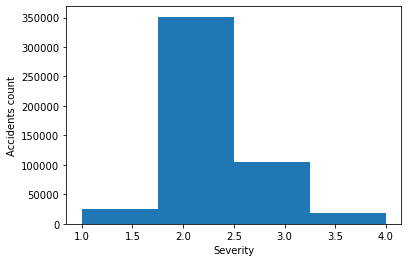

In [32]:
plot_hist(severity, 4 , "Accidents count", "Severity")

We see tat the our distribution has a dominant class. This is realy important for model eveluation.

Our next strep is to pepair the training data.

First we remove our target column.

In [33]:
accidents_attributes = accidents_info.drop("Severity", axis=1)
accidents_attributes = pd.get_dummies(accidents_attributes)

Second we see that all are values are numerical.

In [34]:
print(accidents_attributes.shape)
print(accidents_attributes.dtypes.unique())

(500581, 176)
[dtype('float64') dtype('int64') dtype('uint8')]


Third we scale our data, we dont know if that is necesery but that is one of the thing that if you do if it does not help it will not hurt the results.

In [35]:
accidents_attributes_scaled = MinMaxScaler().fit_transform(accidents_attributes)
accidents_attributes_scaled

array([[7.51658846e-01, 8.02117715e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.54645557e-01, 7.98915991e-01, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.43953057e-01, 8.00770434e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.89132916e-01, 1.09032605e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.26414505e-01, 7.26348430e-01, 1.88281187e-03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.84182780e-01, 8.34105667e-01, 1.99028739e-05, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Our training set is done, now let us split it too tain, validation and test sets.

We will put 20000 samples for validation and testing rest will go for training.

In [36]:
 accidents_attributes_scaled_train, accidents_attributes_scaled_test, severity_train, severity_test =train_test_split(
     accidents_attributes_scaled, severity, test_size = 20000, stratify = severity)

In [37]:
print(accidents_attributes_scaled_train.shape,accidents_attributes_scaled_test.shape)
print(severity_train.shape,severity_test.shape)

(480581, 176) (20000, 176)
(480581,) (20000,)


Well it seams everthing is in orther finally we will plot the traing and testing set of the target to see the distribution.

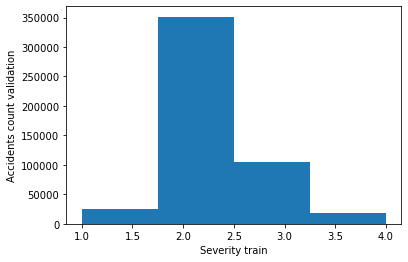

In [38]:
plot_hist(severity_test, 4 , "Accidents count validation", "Severity train")

In [39]:
 accidents_attributes_scaled_train_for_val, accidents_attributes_scaled_validation, severity_train_for_val, severity_validation =train_test_split(
     accidents_attributes_scaled_train, severity_train, test_size = 20000, stratify = severity_train)

In [40]:
print(accidents_attributes_scaled_train_for_val.shape,accidents_attributes_scaled_validation.shape)
print(severity_train_for_val.shape,severity_validation.shape)

(460581, 176) (20000, 176)
(460581,) (20000,)


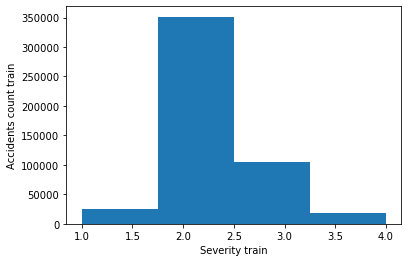

In [41]:
plot_hist(severity_validation, 4 , "Accidents count train", "Severity train")

The destribution seams the same so we will start with our modeling work.

One last thing since we had so much data processed we need all of our machines resouces, for that we will run a Garbige Collector to clear all that we did not need (unreferenced memory mostly).

In [42]:
gc.collect()

8959

## 4. Classification on the whole data.

We will start as tring to train different models base on the whole data even it has a dominant class with over 60% of samples.

We will start with Logistic Regression.

### 4.A Logistic Regression

In [43]:
logistic_regression = LogisticRegression()

In [44]:
start_time = time.time()
logistic_regression.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)

C:\Users\plamen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Well we have reached the limit of iterations, we will fix this by increasing their number but first lets see the scores. We will make a function that, we will use a lot for evelueting in our work.

In [45]:
def display_scores(estimator, train_attributes, train_labels, test_attributes, test_labels, time_for_train):
    print(f"Train score: {estimator.score(train_attributes, train_labels)}")
    print(f"Test score: {estimator.score(test_attributes, test_labels)}")
    print(f"Time Needed: {time_for_train} secnods")

In [46]:
display_scores(logistic_regression, 
               accidents_attributes_scaled_train_for_val, severity_train_for_val, 
               accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.7316215823058267
Test score: 0.732
Time Needed: 30.285001516342163 secnods


The result does not look bad 73% over 4 classes, but that is deceiving we will get some more realiable metrics for better evaluation but now lets fix the iterations problem and see the results then.

In [47]:
logistic_regression = LogisticRegression(max_iter=2000, solver="sag")
start_time = time.time()
logistic_regression.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
display_scores(logistic_regression, 
               accidents_attributes_scaled_train_for_val, severity_train_for_val, 
               accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.7324813659269488
Test score: 0.7326
Time Needed: 85.14099550247192 secnods


Can we improve the score ? One way to try and improve it is to use polynomial features. As we saw, this creates all possible multiples of input features, and we will Create a model for quadratic features (degree = 2). 

The problem here is that our data set need to much memory (more than 50 GiB) so we can not use it with degree = 2...

The error we get is:

**"MemoryError: Unable to allocate 58.1 GiB for an array with shape (500581, 15577) and data type float64"**

So we will skip this Preprocessing step

In [48]:
# quad_feature_transformer = PolynomialFeatures(degree = 2, interaction_only = True)
# accidents_attributes_quad = quad_feature_transformer.fit_transform(accidents_attributes)

Now we will try GridSearch to get better results by changing the values of hyperparameter C.

In [49]:
params_lr = {
    "solver": ["sag"],
    "C": [0.01, 0.1, 1, 10]
}
grid_search_lr = GridSearchCV(LogisticRegression(), params_lr, estimator = 'f1_macro', n_jobs=4)
start_time = time.time()
grid_search_lr.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
grid_search_lr.best_estimator_
grid_search_lr.cv_results_
display_scores(grid_search_lr.best_estimator_, 
               accidents_attributes_scaled_train_for_val, severity_train_for_val, 
               accidents_attributes_scaled_validation, severity_validation, time_for_train)
logistic_regression = grid_search_lr.best_estimator_

C:\Users\plamen\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train score: 0.7329438252989159
Test score: 0.73305
Time Needed: 699.2731502056122 secnods


Now we need to predict the results from and see how our model performs in detail.

In [50]:
train_prediction = logistic_regression.predict(accidents_attributes_scaled_train_for_val)
val_prediction = logistic_regression.predict(accidents_attributes_scaled_validation)

And we get test and train scores of around 73%, but this is accuracy and it is not good evaluation of an unbalanced data set such as ours. So we Need othe measuments.

We will define a Function to get our results and a function to plot a Confusion Metrix

In [51]:
def get_predict_metrics(reality, prediction):
    print(f"F1 macro score: {f1_score(reality, prediction, average='macro')}")
    print(f"F1 score: {f1_score(reality, prediction, average='weighted')}")
    print(f"Accuracy: {accuracy_score(reality, prediction)}")
    print(f"Recall: {recall_score(reality, prediction, average='weighted')}")
    print(f"Precision: {precision_score(reality, prediction, average='weighted')}")
    print(f"\n clasification report:\n {classification_report(reality,prediction)}")

In [52]:
def plot_confusin_matrix(estimator,attributes, labels, title = None):
    predictions = estimator.predict(attributes)
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(6,4))
    if title is not None:
        plt.title(title)
    sns.heatmap(cm, annot=True, fmt=".0f",cmap=plt.cm.Blues, 
            xticklabels=estimator.classes_, yticklabels=estimator.classes_)
    plt.show()

F1 macro score: 0.3812340124400061
F1 score: 0.6841564595660717
Accuracy: 0.73305
Recall: 0.73305
Precision: 0.6940374452236472

 clasification report:
               precision    recall  f1-score   support

           1       0.61      0.15      0.24      1022
           2       0.76      0.95      0.84     14038
           3       0.57      0.28      0.38      4193
           4       0.34      0.04      0.07       747

    accuracy                           0.73     20000
   macro avg       0.57      0.35      0.38     20000
weighted avg       0.69      0.73      0.68     20000



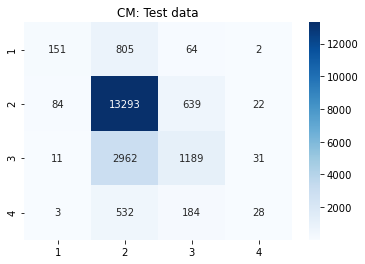

In [53]:
get_predict_metrics(severity_validation,val_prediction)
plot_confusin_matrix(logistic_regression,
                     accidents_attributes_scaled_validation, 
                     severity_validation, 
                     title="CM: Test data")

F1 macro score: 0.38434931304775516
F1 score: 0.6852223882763512
Accuracy: 0.7329438252989159
Recall: 0.7329438252989159
Precision: 0.6937206683796469

 clasification report:
               precision    recall  f1-score   support

           1       0.59      0.16      0.25     23528
           2       0.76      0.94      0.84    323294
           3       0.56      0.29      0.38     96564
           4       0.38      0.03      0.06     17195

    accuracy                           0.73    460581
   macro avg       0.57      0.36      0.38    460581
weighted avg       0.69      0.73      0.69    460581



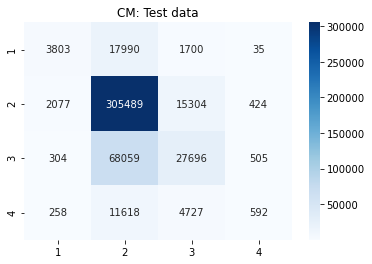

In [54]:
get_predict_metrics(severity_train_for_val,train_prediction)
plot_confusin_matrix(logistic_regression,
                     accidents_attributes_scaled_train_for_val, 
                     severity_train_for_val, 
                     title="CM: Test data")

We can see from our maurements that the picture is a bit different our model does Great on dominant classs and no so good on the second and really bad on the two with the least samples. So almost every accident we get our model will put it as Severity of 2, this is sertain for Severity 1 and Severity 4 and maybe for Severity 3. So we can say that **Logistic regrasion as we do it is Not so productive. We had just 38% F1 macro avg score and our goal is 80%**

### 4.B Desision Trees

Now we will try decision tree as a classifier and see can we get better results

In [55]:
tree = DecisionTreeClassifier()

In [56]:
tree.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)

DecisionTreeClassifier()

In [57]:
display_scores(tree, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.9991944956478882
Test score: 0.79445
Time Needed: 699.2731502056122 secnods


By the scores we get it seams we have realy good result but maybe too good for the training score, that is a indicator for a over fit, so we will make a Grid Search to try reduce this overfit.

In [58]:
tree.get_depth()

59

In [59]:
params = {
    "max_depth": [10, 20, 30, 40, 60], 
}

tree_classifier = DecisionTreeClassifier(criterion='entropy')
start_time = time.time()
grid_search = GridSearchCV(tree_classifier, params,estimator = 'f1_macro', n_jobs=4)
grid_search.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
tree_classifier = grid_search.best_estimator_

print(tree_classifier)

DecisionTreeClassifier(criterion='entropy', max_depth=20)


In [60]:
display_scores(grid_search.best_estimator_, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.8732926455932832
Test score: 0.7946
Time Needed: 310.4861264228821 secnods


 Well we have realy good resulst Max depth of 20 so we will stick to it, but we wont try to visualize that, it will take too much time for this depth. But of course we will need to see our metrics.

In [61]:
train_prediction_tree = tree_classifier.predict(accidents_attributes_scaled_train_for_val)
val_prediction_tree = tree_classifier.predict(accidents_attributes_scaled_validation)

F1 macro score: 0.6604591633828714
F1 score: 0.7871397130286593
Accuracy: 0.7946
Recall: 0.7946
Precision: 0.7838013619318436

 clasification report:
               precision    recall  f1-score   support

           1       0.72      0.64      0.68      1022
           2       0.85      0.91      0.88     14038
           3       0.62      0.51      0.56      4193
           4       0.59      0.48      0.53       747

    accuracy                           0.79     20000
   macro avg       0.69      0.63      0.66     20000
weighted avg       0.78      0.79      0.79     20000



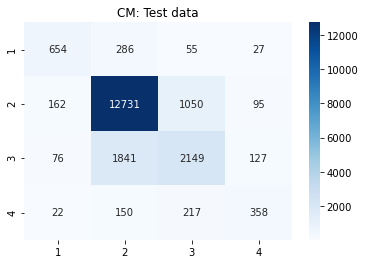

In [62]:
get_predict_metrics(severity_validation,val_prediction_tree)
plot_confusin_matrix(tree_classifier,
                     accidents_attributes_scaled_validation, 
                     severity_validation, 
                     title="CM: Test data")

F1 macro score: 0.8116976694143698
F1 score: 0.8692463144988727
Accuracy: 0.8732926455932832
Recall: 0.8732926455932832
Precision: 0.8697217273496938

 clasification report:
               precision    recall  f1-score   support

           1       0.87      0.79      0.83     23528
           2       0.89      0.95      0.92    323294
           3       0.79      0.67      0.72     96564
           4       0.88      0.69      0.78     17195

    accuracy                           0.87    460581
   macro avg       0.86      0.77      0.81    460581
weighted avg       0.87      0.87      0.87    460581



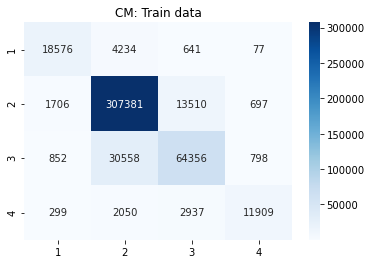

In [63]:
get_predict_metrics(severity_train_for_val,train_prediction_tree)
plot_confusin_matrix(tree_classifier,
                     accidents_attributes_scaled_train_for_val, 
                     severity_train_for_val, 
                     title="CM: Train data")

So we can see we have grat Traing socres almost everything is predicted right, at the diagonal we have almost over 81% of the samples so they are predicted corectly. But on the validation set, well it is still lower than our expectaions but at least model is correct a **67%** of the time for classifing the Accident Severity, up from under **38% for Logistic Regresion model**.

Can we get better result ? At least we can try, our next step is...

### 4.C Random Forest

In [64]:
forest = RandomForestClassifier()
start_time = time.time()
forest.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
display_scores(forest, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.9991771262818049
Test score: 0.82565
Time Needed: 302.6729984283447 secnods


We have even realy good results but again we will change the Hyperparameter n_estimators to see if we can get even better ones. We will use our oun function because we want to consider the time for training too.

In [65]:
def random_forest_N_est(n):
    print(f"n_estimators: {n}")
    forest = RandomForestClassifier(n_estimators=n)
    start_time = time.time()
    forest.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
    time_for_train = (time.time() - start_time)
    display_scores(forest, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)
    del forest
    print(f"====================================")

In [66]:
random_forest_N_est(10)
random_forest_N_est(15)
random_forest_N_est(20)
random_forest_N_est(30)
random_forest_N_est(50)

n_estimators: 10
Train score: 0.9873464168083356
Test score: 0.81365
Time Needed: 30.21899652481079 secnods
n_estimators: 15
Train score: 0.9946198388557062
Test score: 0.81465
Time Needed: 45.88002014160156 secnods
n_estimators: 20
Train score: 0.9960984061435448
Test score: 0.81925
Time Needed: 60.63099408149719 secnods
n_estimators: 30
Train score: 0.9979894958758612
Test score: 0.8227
Time Needed: 88.40398454666138 secnods
n_estimators: 50
Train score: 0.9989296128151183
Test score: 0.8244
Time Needed: 152.4350230693817 secnods


Training with different values of Hyperparameter - "n_estimators" seams have close result so we will try to change one more Hyperparameter - Depth to try to lower the thain score to values of 95%. To do so we will make a function again to try guide ourself to the best value of the parameter.

In [67]:
def random_forest_Depth(n,depth):
    print(f"n_estimators: {n}, Depth: {depth}")
    forest = RandomForestClassifier(n_estimators=n, max_depth = depth)
    start_time = time.time()
    forest.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
    time_for_train = (time.time() - start_time)
    display_scores(forest, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)
    del forest
    print(f"====================================")

In [68]:
random_forest_Depth(30, 20)
random_forest_Depth(30, 30)
random_forest_Depth(30, 40)
random_forest_Depth(40, 20)
random_forest_Depth(40, 30)
random_forest_Depth(40, 40)

n_estimators: 30, Depth: 20
Train score: 0.8240830603086102
Test score: 0.7811
Time Needed: 74.89499545097351 secnods
n_estimators: 30, Depth: 30
Train score: 0.9358701292497954
Test score: 0.81355
Time Needed: 86.7160131931305 secnods
n_estimators: 30, Depth: 40
Train score: 0.9887620201441223
Test score: 0.82
Time Needed: 91.52600026130676 secnods
n_estimators: 40, Depth: 20
Train score: 0.826990257956798
Test score: 0.785
Time Needed: 99.66798448562622 secnods
n_estimators: 40, Depth: 30
Train score: 0.9369448587761979
Test score: 0.8153
Time Needed: 116.62598276138306 secnods
n_estimators: 40, Depth: 40
Train score: 0.9919015330636739
Test score: 0.8237
Time Needed: 119.73996615409851 secnods


It seams that the score for the depth count of 30 and 40 with n_estimators around 40 looks ok, but we wil make Grid Search to try make it even better.

In [69]:
params = {
    "n_estimators": [30, 40],
    "max_depth": [37, 38, 39, 41, 42, 43]
}

forest_classifier = RandomForestClassifier()
start_time = time.time()
grid_search = GridSearchCV(forest_classifier, params,estimator = 'f1_macro', n_jobs=4)
grid_search.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
forest_classifier = grid_search.best_estimator_
print(forest_classifier)
display_scores(forest_classifier, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                accidents_attributes_scaled_validation, severity_validation, time_for_train)

RandomForestClassifier(max_depth=41, n_estimators=40)
Train score: 0.9930869922988573
Test score: 0.82315
Time Needed: 1829.3523044586182 secnods


The next step is to get the predictions from our Random Forest model.

In [70]:
train_prediction_forest = forest_classifier.predict(accidents_attributes_scaled_train_for_val)
val_prediction_forest = forest_classifier.predict(accidents_attributes_scaled_validation)

And cheking the testing and training results.

F1 macro score: 0.7053987813676952
F1 score: 0.8120726806914199
Accuracy: 0.82315
Recall: 0.82315
Precision: 0.8153013137534415

 clasification report:
               precision    recall  f1-score   support

           1       0.81      0.59      0.68      1022
           2       0.84      0.94      0.89     14038
           3       0.72      0.53      0.61      4193
           4       0.83      0.52      0.64       747

    accuracy                           0.82     20000
   macro avg       0.80      0.65      0.71     20000
weighted avg       0.82      0.82      0.81     20000



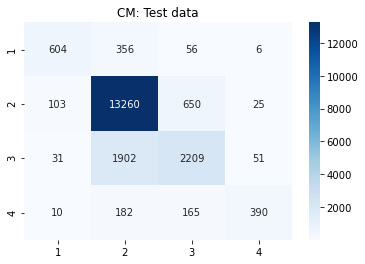

In [71]:
get_predict_metrics(severity_validation,val_prediction_forest)
plot_confusin_matrix(forest_classifier,
                     accidents_attributes_scaled_validation, 
                     severity_validation, 
                     title="CM: Test data")

F1 macro score: 0.8116976694143698
F1 score: 0.8692463144988727
Accuracy: 0.8732926455932832
Recall: 0.8732926455932832
Precision: 0.8697217273496938

 clasification report:
               precision    recall  f1-score   support

           1       0.87      0.79      0.83     23528
           2       0.89      0.95      0.92    323294
           3       0.79      0.67      0.72     96564
           4       0.88      0.69      0.78     17195

    accuracy                           0.87    460581
   macro avg       0.86      0.77      0.81    460581
weighted avg       0.87      0.87      0.87    460581



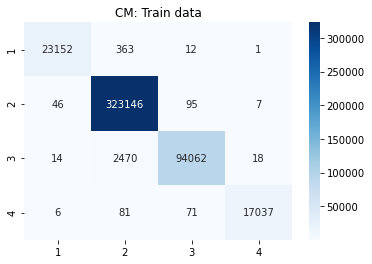

In [72]:
get_predict_metrics(severity_train_for_val,train_prediction_tree)
plot_confusin_matrix(forest_classifier,
                     accidents_attributes_scaled_train_for_val, 
                     severity_train_for_val, 
                     title="CM: Train data")

It seams that the results for **Accidents Saverity (AS)** are realy good, with **Random forest test F1 macro score are over 71%** up from around **68%* for Decision Tree**.

Our best model Now is **RandomForestClassifier(max_depth=41, n_estimators=40)**

But let us move forwar to SVM, and see what results we will get from it.

### 4.D Support Vector Machines

We will start with Leaniear SVM Classifier with Hyperparameter C = 0.01, the same that work for us in LogisticRegresion model, the goal is to increase the regularisation and reduce the training time, and we will see how it goes.

In [73]:
svm = LinearSVC(C = 0.01)
start_time = time.time()
svm.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
display_scores(svm, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.7268927723896557
Test score: 0.72705
Time Needed: 9.383981943130493 secnods


We got realy bad results, so we will try to improve them with change in values of the hyperparameter C.

In [74]:
params = {
    "C": [0,1, 1, 5, 25]
}

linear_svm_classifier = LinearSVC()
start_time = time.time()
grid_search = GridSearchCV(linear_svm_classifier, params,estimator = 'f1_macro', n_jobs=4)
grid_search.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
time_for_train = (time.time() - start_time)
linear_svm_classifier = grid_search.best_estimator_

print(linear_svm_classifier)

LinearSVC(C=5)


C:\Users\plamen\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
display_scores(linear_svm_classifier, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
                   accidents_attributes_scaled_validation, severity_validation, time_for_train)

Train score: 0.7273704299569457
Test score: 0.7276
Time Needed: 3273.390960216522 secnods


In [76]:
train_prediction_linear_svm = linear_svm_classifier.predict(accidents_attributes_scaled_train_for_val)
val_prediction_linear_svm = linear_svm_classifier.predict(accidents_attributes_scaled_validation)

F1 macro score: 0.3360357535708749
F1 score: 0.6662404321253741
Accuracy: 0.7276
Recall: 0.7276
Precision: 0.6832402456290342

 clasification report:
               precision    recall  f1-score   support

           1       0.53      0.09      0.15      1022
           2       0.74      0.96      0.84     14038
           3       0.59      0.23      0.33      4193
           4       0.31      0.01      0.02       747

    accuracy                           0.73     20000
   macro avg       0.54      0.32      0.34     20000
weighted avg       0.68      0.73      0.67     20000



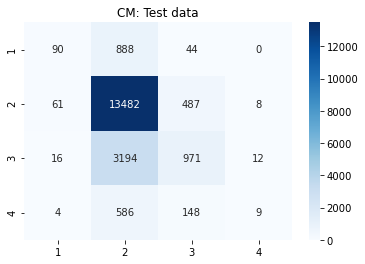

In [77]:
get_predict_metrics(severity_validation,val_prediction_linear_svm)
plot_confusin_matrix(linear_svm_classifier,
                     accidents_attributes_scaled_validation, 
                     severity_validation, 
                     title="CM: Test data")

F1 macro score: 0.34029191873923637
F1 score: 0.6677024615319456
Accuracy: 0.7273704299569457
Recall: 0.7273704299569457
Precision: 0.6819915508827942

 clasification report:
               precision    recall  f1-score   support

           1       0.51      0.10      0.16     23528
           2       0.74      0.96      0.84    323294
           3       0.58      0.24      0.34     96564
           4       0.33      0.01      0.02     17195

    accuracy                           0.73    460581
   macro avg       0.54      0.33      0.34    460581
weighted avg       0.68      0.73      0.67    460581



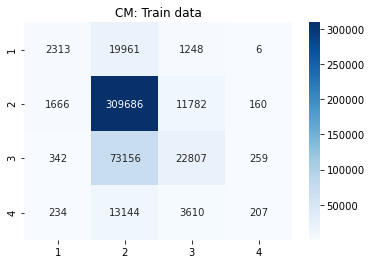

In [78]:
get_predict_metrics(severity_train_for_val,train_prediction_linear_svm)
plot_confusin_matrix(linear_svm_classifier,
                     accidents_attributes_scaled_train_for_val, 
                     severity_train_for_val, 
                     title="CM: Train data")

Results we have are bad **34% for F1 macro avg** is more then **double less** of what we have, and the model is continuing to give rufly the same results after change in the regularisation but the time needed to train a model, so here we will need some dimensionality reduction, to try dig a little deaper in linear SVM, but beffor we do that we will just give it one try on **C-Support Vector Classification**, mostly to see how long it will take to train a model and also to get a glimpse of the results of course, maybe they will be great.

In [79]:
#svm_circles_gaussian_n = SVC(kernel = "rbf", cache_size=4000)
#start_time = time.time()
#svm_circles_gaussian_n.fit(accidents_attributes_scaled_train_for_val, severity_train_for_val)
#time_for_train = (time.time() - start_time)
#display_scores(svm_circles_gaussian_n, accidents_attributes_scaled_train_for_val, severity_train_for_val, 
#               accidents_attributes_scaled_validation, severity_validation, time_for_train)

After **15 hours of training the model, it is not done** so we are going to stop it and continue on our exploration with some **dimensionality reduction** for SVM.

### 4.E Dimensionality reduction - PCA

Here our goal is to reduce as much as possible the features form 177 of the dataset, but the lost information needs to stay at the minimum, for that job the **Principal component analysis (PCA)** is realy good choise, so lets go and do it.

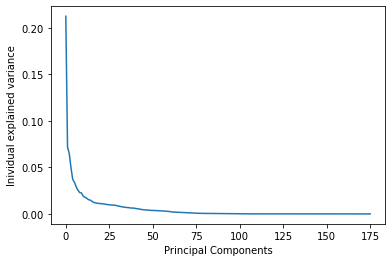

In [80]:
pca = PCA()
pca.fit(accidents_attributes_scaled_train_for_val)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Inividual explained variance")
plt.show()

We can see that maybe first 50 components contain at least 90% of the information but we need to be sure of that. But here we will try to reduce the features as much as possible to reduce the time for computation.

In [81]:
pca_ev_full = pca.explained_variance_.sum()

Maybe can can reduce the our count to just **8 components**, lets see how much information tose care with them.

In [82]:
pca = PCA(n_components=8)
pca.fit(accidents_attributes_scaled_train_for_val)
accidents_attributes_scaled_train_pca = pca.transform(accidents_attributes_scaled_train_for_val)
accidents_attributes_scaled_val_pca = pca.transform(accidents_attributes_scaled_validation)

In [83]:
pca_ev_8 = pca.explained_variance_.sum()

In [84]:
pca_ev_8/pca_ev_full * 100

52.35403098834991

We have lost around 50% of the information so stay with this count of 8 Components

In [85]:
accidents_attributes_scaled_train_pca.shape, accidents_attributes_scaled_val_pca.shape

((460581, 8), (20000, 8))

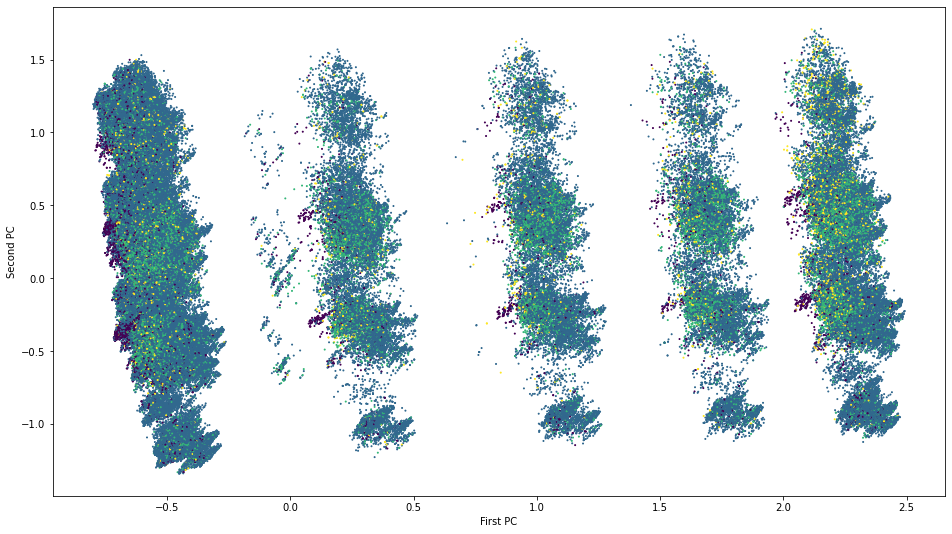

In [86]:
first_pc, second_pc = accidents_attributes_scaled_train_pca[:,0], accidents_attributes_scaled_train_pca[:,1]
genre_colors = LabelEncoder().fit_transform(severity_train_for_val)
genre_colors
plt.figure(figsize=(16,9))
plt.scatter(first_pc,second_pc, c = genre_colors, s = 1)
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

Here we can see that on 2 dementions classes are not forming any Clusters at all, there are points all over the plot. Just in case we will try with **Unsupervised learning** and one of the most used algorithm for **Clustering - K-Means**.

## 4.F Clustering

In our next step we will train a model and see the result metric for it, which is **Silhouette Score** it helps us to see how good the classes are separated in our case, those are the Accidents Saverity 1, 2, 3 and 4.

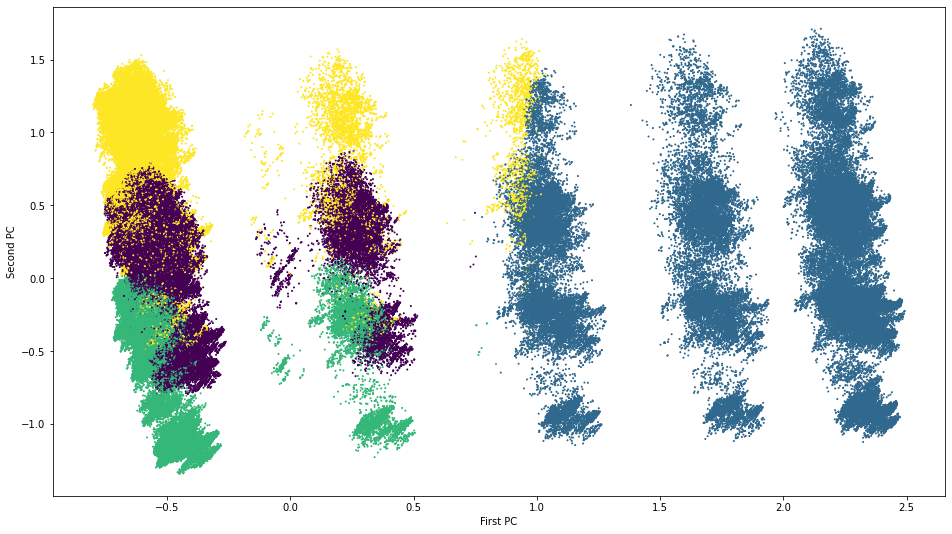

In [87]:
k_means = KMeans(n_clusters = 4)
k_means.fit(accidents_attributes_scaled_train_pca)
predited = k_means.predict(accidents_attributes_scaled_train_pca)

genre_colors = LabelEncoder().fit_transform(severity_train_for_val)
genre_colors
plt.figure(figsize=(16,9))
plt.scatter(accidents_attributes_scaled_train_pca[:,0], 
            accidents_attributes_scaled_train_pca[:,1], 
            c = predited, s =1)
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

It seams that the result from first 2 Principle components of K-means is realy bad.

We will try to get good evaluation by getting the **silhouette_score**.

In [88]:
#kmeans_silhouette = silhouette_score(accidents_attributes_scaled_train_pca, k_means.labels_)

I stoped it after 2 hours and based on information i found on internet *https://www.mathworks.com/matlabcentral/answers/319554-clustering-evaluation-with-silhouette-extremely-slow*, it seams it will need realy long time for our dataset so will skipt it.

Finaly we will try a SVM with the dataset we got from PCA.

### 4.G SVM with PCA

we will make a grid search with 4 different values of paramether C.

In [89]:
params = {
    "C": [0.01, 0.1, 1, 10]
}

linear_svm_classifier = LinearSVC()
start_time = time.time()
grid_search = GridSearchCV(linear_svm_classifier, params,estimator = 'f1_macro',  n_jobs=4)
grid_search.fit(accidents_attributes_scaled_train_pca, severity_train_for_val)
time_for_train = (time.time() - start_time)
linear_svm_classifier = grid_search.best_estimator_

print(linear_svm_classifier)

LinearSVC(C=0.01)


In [90]:
display_scores(linear_svm_classifier, accidents_attributes_scaled_train_pca, severity_train_for_val, 
                   accidents_attributes_scaled_val_pca, severity_validation, time_for_train)

Train score: 0.7019481915233151
Test score: 0.70195
Time Needed: 1154.2009994983673 secnods


We have got the results the are not really  promissing but as always lets predict and have in depth inside.

In [91]:
train_prediction_linearSVC = linear_svm_classifier.predict(accidents_attributes_scaled_train_pca)
val_prediction_linearSVC = linear_svm_classifier.predict(accidents_attributes_scaled_val_pca)

F1 macro score: 0.20648313783251743
F1 score: 0.5792245653382525
Accuracy: 0.7019481915233151
Recall: 0.7019481915233151
Precision: 0.5857396260720183


C:\Users\plamen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\plamen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 clasification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     23528
           2       0.70      1.00      0.82    323294
           3       0.44      0.00      0.00     96564
           4       0.00      0.00      0.00     17195

    accuracy                           0.70    460581
   macro avg       0.29      0.25      0.21    460581
weighted avg       0.59      0.70      0.58    460581



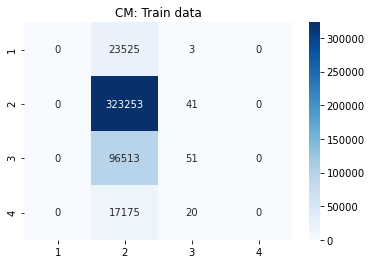

In [92]:
get_predict_metrics(severity_train_for_val,train_prediction_linearSVC)
plot_confusin_matrix(linear_svm_classifier,
                     accidents_attributes_scaled_train_pca, 
                     severity_train_for_val, 
                     title="CM: Train data")

This resuls are **really bad** compared to the best Model we have - Random Forest with F1 macro scores  0.81 comapired to 21 on our train data. 

Even though we lost just under 50% of the data information, droped features more than 20 times using PCA the time needed for train is just 2.5 times lower, so timewise this SVM with PCA is not working we can try one more thing undersampling, reduce the data to equal number samples to each class, this will reduce our dataset from 460000 to arownd 100000.

## 5 Classification with Under Sampling

### 5.A Undersample the data

First we need to get our data, each class count will be close to the our lowest class count. That is 18689 samples. So so we will drop class 2 and 3 to 29000 and 27000 to keep them more significant.

Severity
1     25572
2    351370
3    104950
4     18689
dtype: int64
Random under-sampling:
2    29000
3    27000
1    25572
4    18689
Name: Severity, dtype: int64


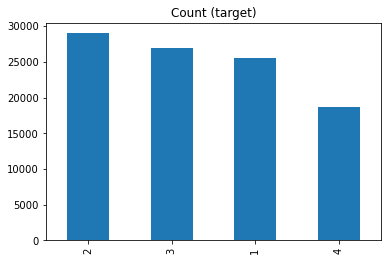

In [93]:
print(accidents_info.groupby(accidents_info["Severity"]).size())
accidents_info_class_1 = accidents_info[accidents_info['Severity'] == 1]
accidents_info_class_2 = accidents_info[accidents_info['Severity'] == 2]
accidents_info_class_3 = accidents_info[accidents_info['Severity'] == 3]
accidents_info_class_4 = accidents_info[accidents_info['Severity'] == 4]

accidents_info_class_2_under = accidents_info_class_2.sample(29000)
accidents_info_class_3_under = accidents_info_class_3.sample(27000)

accidents_info_under = pd.concat([accidents_info_class_1, 
                                       accidents_info_class_2_under,
                                       accidents_info_class_3_under, 
                                       accidents_info_class_4], axis=0)

del accidents_info_class_1
del accidents_info_class_2
del accidents_info_class_3
del accidents_info_class_4

print('Random under-sampling:')
print(accidents_info_under.Severity.value_counts())

accidents_info_under.Severity.value_counts().plot(kind='bar', title='Count (target)');

We have done it Now we will get our Target and Training set.

In [94]:
severity_under = accidents_info_under["Severity"]
severity_under

517405     1
518530     1
518846     1
522885     1
527167     1
          ..
3022590    4
3022593    4
3022769    4
3022891    4
3033285    4
Name: Severity, Length: 100261, dtype: int64

Check if the shapes are Ok, they need to have equal samples.

In [95]:
severity_under.shape, accidents_info_under.shape

((100261,), (100261, 35))

Our next step is to prepair the data for training.

In [96]:
accidents_attributes_under = accidents_info_under.drop("Severity", axis=1)
accidents_attributes_under = pd.get_dummies(accidents_attributes_under)
accidents_attributes_under.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
517405,30.499479,-91.147057,0.0,81.0,81.0,58.0,29.93,10.0,5.0,0.0,...,0,0,1,0,1,0,1,0,1,0
518530,34.923080,-82.307182,0.0,81.0,81.0,58.0,28.97,10.0,12.0,0.0,...,0,0,1,0,1,0,1,0,1,0
518846,36.148781,-86.865150,0.0,70.0,70.0,78.0,29.39,10.0,5.0,0.0,...,0,0,1,0,1,0,1,0,1,0
522885,34.972694,-81.938820,0.0,86.0,86.0,51.0,29.05,10.0,7.0,0.0,...,0,0,1,0,1,0,1,0,1,0
527167,45.067501,-93.186470,0.0,63.0,63.0,30.0,29.02,10.0,16.0,0.0,...,0,0,1,0,1,0,1,0,1,0


Or data is set we have droped the targets column and fixed the categorical columns. Final step we need to scale the data.

In [97]:
accidents_attributes_under_scaled = MinMaxScaler().fit_transform(accidents_attributes_under)
accidents_attributes_under_scaled.shape

(100261, 166)

The data is scaled we just need to split it we will have 10000 smaples for train 10000 for validation and the rest almost 90000 for taining.

In [98]:
 accidents_attributes_under_scaled_train, accidents_under_attributes_scaled_test, severity_under_train, severity_under_test = train_test_split(
     accidents_attributes_under_scaled, 
     severity_under, test_size = 10000, stratify = severity_under)

In [99]:
 accidents_attributes_under_scaled_train_for_val, accidents_attributes_under_scaled_test_for_val, severity_under_train_for_val, severity_under_test_for_val = train_test_split(
     accidents_attributes_under_scaled_train, severity_under_train, test_size = 10000, stratify = severity_under_train)

We have split the data let us see now how diffrent peices looks like.

In [100]:
print(f"Train data: {accidents_attributes_under_scaled_train_for_val.shape}")
print(f"Train target: {severity_under_train_for_val.shape}")
print(f"Validation data: {accidents_attributes_under_scaled_test_for_val.shape}")
print(f"Validation target: {severity_under_test_for_val.shape}")
print(f"Test data: {accidents_under_attributes_scaled_test.shape}")
print(f"Test target: {severity_under_test.shape}")

Train data: (80261, 166)
Train target: (80261,)
Validation data: (10000, 166)
Validation target: (10000,)
Test data: (10000, 166)
Test target: (10000,)


Next step is to start the PCA algorithm and try reduce as much as we can the features without loosing more than 5% of the data.

### 5.B PCA with undersampling

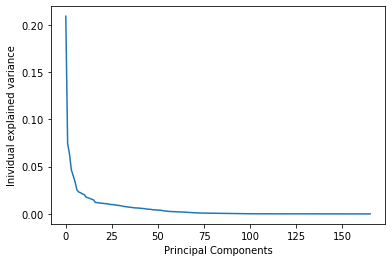

In [101]:
pca_under = PCA()
pca_under.fit(accidents_attributes_under_scaled_train_for_val)
plt.plot(pca_under.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Inividual explained variance")
plt.show()

As expexted the first part of principle components have almost all the data we will get 1/3 of is and hopefuly that will be more than 95% of all the information.

In [102]:
pca_under_ev_full = pca_under.explained_variance_.sum()
print(pca_under_ev_full)
pca_under_95 = PCA(n_components=55)

pca_under_95.fit(accidents_attributes_under_scaled_train_for_val)
accidents_attributes_scaled_under_train_pca = pca_under_95.transform(accidents_attributes_under_scaled_train_for_val)
accidents_attributes_scaled_under_val_pca = pca_under_95.transform(accidents_attributes_under_scaled_test_for_val)

pca_under_ev_95 = pca_under_95.explained_variance_.sum()
print(pca_under_ev_95)

4.9563923281012965
4.7139847849087495


In [103]:
pca_under_ev_95/pca_under_ev_full * 100

95.10919380174634

We have reached our goal, we got over 95%.

Now since get get less smaples with undersampling method, we need more splits in Gris Search so we will make them 4 with StratifiedKFold.

In [104]:
k_fold = StratifiedKFold(n_splits = 4)

Everything seams to be OK.

We will procied now with Logistic regresion.

### 5.C Logistic regression with PCA and undersampling

We will make a GridSearchCV to get the best resulst by changing the hyperparameter C.

In [105]:
params_lr = {
    "solver": ["sag"],
    "C": [0.01, 0.1, 1, 10]
}
grid_search_lr = GridSearchCV(LogisticRegression(), params_lr,estimator = 'f1_macro', cv=k_fold, n_jobs=4)

start_time = time.time()
grid_search_lr.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
time_for_train = (time.time() - start_time)
grid_search_lr.best_estimator_
grid_search_lr.cv_results_
logistic_regression_under = grid_search_lr.best_estimator_
display_scores(logistic_regression_under, 
               accidents_attributes_scaled_under_train_pca, severity_under_train_for_val, 
               accidents_attributes_scaled_under_val_pca, severity_under_test_for_val, time_for_train)

print(logistic_regression_under)

Train score: 0.5134374104484121
Test score: 0.5146
Time Needed: 22.616992950439453 secnods
LogisticRegression(C=10, solver='sag')


The result are bad, let us see them more deeply maybe we can learn something.

In [106]:
train_prediction_under_lr = logistic_regression_under.predict(accidents_attributes_scaled_under_train_pca)
val_prediction_under_lr = logistic_regression_under.predict(accidents_attributes_scaled_under_val_pca)

F1 macro score: 0.49178119232059647
F1 score: 0.5050147465972795
Accuracy: 0.5146
Recall: 0.5146
Precision: 0.5094543651699062

 clasification report:
               precision    recall  f1-score   support

           1       0.56      0.63      0.59      2550
           2       0.52      0.57      0.54      2893
           3       0.49      0.53      0.50      2693
           4       0.46      0.25      0.33      1864

    accuracy                           0.51     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.51      0.51     10000



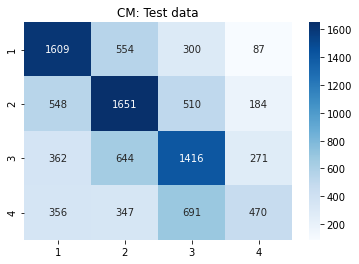

In [107]:
get_predict_metrics(severity_under_test_for_val, val_prediction_under_lr)
plot_confusin_matrix(logistic_regression_under,
                     accidents_attributes_scaled_under_val_pca, 
                     severity_under_test_for_val, 
                     title="CM: Test data")

F1 macro score: 0.49064564991346216
F1 score: 0.503872040999361
Accuracy: 0.5134374104484121
Recall: 0.5134374104484121
Precision: 0.509638715364171

 clasification report:
               precision    recall  f1-score   support

           1       0.56      0.62      0.59     20471
           2       0.52      0.56      0.54     23215
           3       0.48      0.54      0.51     21614
           4       0.47      0.25      0.33     14961

    accuracy                           0.51     80261
   macro avg       0.51      0.49      0.49     80261
weighted avg       0.51      0.51      0.50     80261



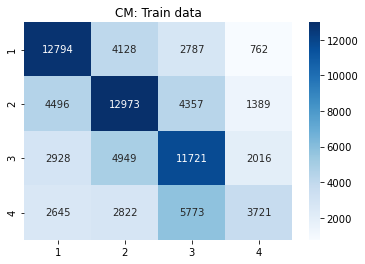

In [108]:
get_predict_metrics(severity_under_train_for_val, train_prediction_under_lr)
plot_confusin_matrix(logistic_regression_under,
                     accidents_attributes_scaled_under_train_pca, 
                     severity_under_train_for_val, 
                     title="CM: Train data")

Training and testing result are not so bad as we have with SVM and LR beffor Undersamplig, becouse beffor we have the same number of samles, almost ever accindet was classified with Severity of 2 and we had chanse almost 0 to have Accident with Severity of 1 to be classified corectly.

Now the chanse is just under 50%, but we our best model still is **RandomForestClassifier** with over **70% of the F1 macro avg score**.

Next step is Decision Tree with PCA and Undefiting.

### 5.D Decicion Tree with PCA and undersampling

We will make a GridSearchCV to get the best resulst by changing the depth of the tree.

In [109]:
params = {
    "max_depth": [5,10,20,30,40,50,60,70], 
}

tree_classifier = DecisionTreeClassifier()
start_time = time.time()
grid_search = GridSearchCV(tree_classifier, params,estimator = 'f1_macro', cv = k_fold, n_jobs=4)
grid_search.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
time_for_train = (time.time() - start_time)
tree_classifier = grid_search.best_estimator_

print(tree_classifier)
print("Decision tree; best score:", grid_search.best_score_)

DecisionTreeClassifier(max_depth=20)
Decision tree; best score: 0.5148328675103034


We got our best estimator next step is to predic and get results.

In [110]:
train_prediction_tree_under_pca = tree_classifier.predict(accidents_attributes_scaled_under_train_pca)
val_prediction_tree_under_pca = tree_classifier.predict(accidents_attributes_scaled_under_val_pca)

F1 macro score: 0.5284442381549217
F1 score: 0.5329253992649094
Accuracy: 0.5353
Recall: 0.5353
Precision: 0.534110400463615

 clasification report:
               precision    recall  f1-score   support

           1       0.65      0.71      0.68      2550
           2       0.54      0.48      0.50      2893
           3       0.46      0.52      0.49      2693
           4       0.48      0.41      0.44      1864

    accuracy                           0.54     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.54      0.53     10000



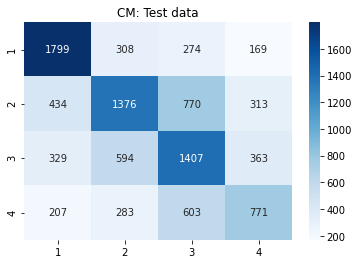

In [111]:
get_predict_metrics(severity_under_test_for_val,val_prediction_tree_under_pca)
plot_confusin_matrix(tree_classifier,
                     accidents_attributes_scaled_under_val_pca, 
                     severity_under_test_for_val, 
                     title="CM: Test data")

F1 macro score: 0.8202648090178388
F1 score: 0.8235514852918928
Accuracy: 0.8238247716823862
Recall: 0.8238247716823862
Precision: 0.828631591405827

 clasification report:
               precision    recall  f1-score   support

           1       0.86      0.91      0.88     20471
           2       0.87      0.81      0.84     23215
           3       0.73      0.84      0.78     21614
           4       0.85      0.71      0.77     14961

    accuracy                           0.82     80261
   macro avg       0.83      0.82      0.82     80261
weighted avg       0.83      0.82      0.82     80261



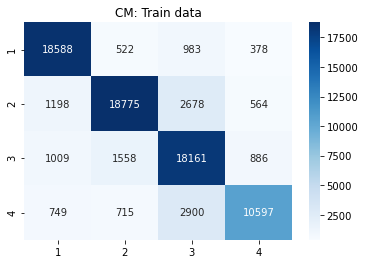

In [112]:
get_predict_metrics(severity_under_train_for_val,train_prediction_tree_under_pca)
plot_confusin_matrix(tree_classifier,
                     accidents_attributes_scaled_under_train_pca, 
                     severity_under_train_for_val, 
                     title="CM: Train data")

Result are just **3% better then our Logistic regression with PCA**, there for Decision Tree with PCA is not good algorithm for us, realy far for 71% F1 macro for the RandomForest validation resulst.

Next step is Random Forest with PCA and Undefiting.

### 5.E Random Forest with PCA and undersampling

We will make a GridSearchCV to get the best resulst by changing the number of trees of the "forest". We will do the same steps as beffor just using our PCA dataset.

In [113]:
params = {
    "n_estimators": [30, 40],
    "max_depth": [27, 28, 29, 30, 31, 32, 33, 34]
}

forest_classifier_under = RandomForestClassifier()
start_time = time.time()
grid_search = GridSearchCV(forest_classifier_under, params,estimator = 'f1_macro', cv = k_fold, n_jobs=4)
grid_search.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
ime_for_train = (time.time() - start_time)
forest_classifier_under = grid_search.best_estimator_

display_scores(forest_classifier_under, 
               accidents_attributes_scaled_under_train_pca, severity_under_train_for_val, 
               accidents_attributes_scaled_under_val_pca, severity_under_test_for_val, time_for_train)

Train score: 0.9929604664781152
Test score: 0.6146
Time Needed: 62.17518711090088 secnods


In [114]:
forest_classifier_under

RandomForestClassifier(max_depth=27, n_estimators=40)

We have our the best estimatior and lets see the results.

In [115]:
train_prediction_forest_under_pca = forest_classifier_under.predict(accidents_attributes_scaled_under_train_pca)
val_prediction_forest_under_pca = forest_classifier_under.predict(accidents_attributes_scaled_under_val_pca)

F1 macro score: 0.6113182047753191
F1 score: 0.613467752505611
Accuracy: 0.6146
Recall: 0.6146
Precision: 0.6163621221384166

 clasification report:
               precision    recall  f1-score   support

           1       0.72      0.76      0.74      2550
           2       0.59      0.59      0.59      2893
           3       0.53      0.58      0.55      2693
           4       0.64      0.50      0.56      1864

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



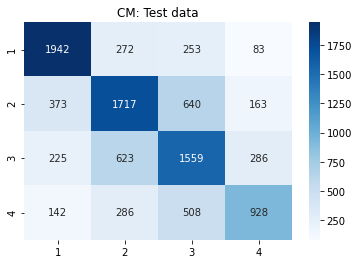

In [116]:
get_predict_metrics(severity_under_test_for_val,val_prediction_forest_under_pca)
plot_confusin_matrix(forest_classifier_under,
                     accidents_attributes_scaled_under_val_pca, 
                     severity_under_test_for_val, 
                     title="CM: Test data")

F1 macro score: 0.9929508944413951
F1 score: 0.9929631361685352
Accuracy: 0.9929604664781152
Recall: 0.9929604664781152
Precision: 0.993006004705653

 clasification report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99     20471
           2       1.00      0.99      0.99     23215
           3       0.99      1.00      0.99     21614
           4       1.00      0.99      0.99     14961

    accuracy                           0.99     80261
   macro avg       0.99      0.99      0.99     80261
weighted avg       0.99      0.99      0.99     80261



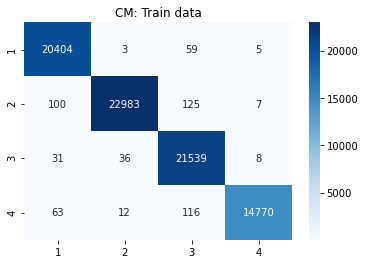

In [117]:
get_predict_metrics(severity_under_train_for_val,train_prediction_forest_under_pca)
plot_confusin_matrix(forest_classifier_under,
                     accidents_attributes_scaled_under_train_pca, 
                     severity_under_train_for_val, 
                     title="CM: Train data")

Well those are the best results et for undersampling with PCA the Macro F1 score is over 60% that means every 3 of 5 Accident will be classified corectly by the model bu still the model for the oridinal datates is better 65%.

we will go finaly to see result for Support Vector Machines with PCA and undersampling.

### 5.F Support Vector Machines with PCA and undersampling

We will make a GridSearchCV to get the best resulst by changing the value of Hyperparameter C. We will do the same steps as beffor just using our PCA dataset.

In [118]:
params = {
    "C": [0.01, 0.05, 0.2, 1, 5, 25]
}

linear_svm_classifier_under = LinearSVC()
start_time = time.time()
grid_search = GridSearchCV(linear_svm_classifier_under, params,estimator = 'f1_macro', n_jobs=4)
grid_search.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
time_for_train = (time.time() - start_time)
linear_svm_classifier_under = grid_search.best_estimator_

print(linear_svm_classifier_under)

LinearSVC(C=1)


So we have got our best model **LinearSVC(C=1)**, lets make some predictions and see how will perform.

In [119]:
display_scores(linear_svm_classifier_under, 
               accidents_attributes_scaled_under_train_pca, severity_under_train_for_val, 
               accidents_attributes_scaled_under_val_pca, severity_under_test_for_val, time_for_train)

Train score: 0.5093881212544075
Test score: 0.5083
Time Needed: 566.0809977054596 secnods


In [120]:
train_prediction_linear_svm_under_pca = linear_svm_classifier_under.predict(accidents_attributes_scaled_under_train_pca)
val_prediction_linear_svm_under_pca = linear_svm_classifier_under.predict(accidents_attributes_scaled_under_val_pca)

F1 macro score: 0.4806297945106254
F1 score: 0.4956481963468467
Accuracy: 0.5083
Recall: 0.5083
Precision: 0.5036708861947382

 clasification report:
               precision    recall  f1-score   support

           1       0.55      0.63      0.59      2550
           2       0.51      0.58      0.54      2893
           3       0.48      0.52      0.50      2693
           4       0.47      0.22      0.30      1864

    accuracy                           0.51     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.51      0.50     10000



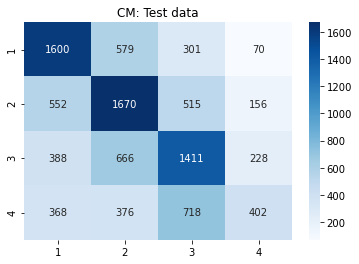

In [121]:
get_predict_metrics(severity_under_test_for_val,val_prediction_linear_svm_under_pca)
plot_confusin_matrix(linear_svm_classifier_under,
                     accidents_attributes_scaled_under_val_pca, 
                     severity_under_test_for_val, 
                     title="CM: Test data")

F1 macro score: 0.482359501725861
F1 score: 0.49712854789186706
Accuracy: 0.5093881212544075
Recall: 0.5093881212544075
Precision: 0.5062512092703467

 clasification report:
               precision    recall  f1-score   support

           1       0.55      0.62      0.58     20471
           2       0.51      0.57      0.54     23215
           3       0.47      0.54      0.50     21614
           4       0.48      0.22      0.30     14961

    accuracy                           0.51     80261
   macro avg       0.50      0.49      0.48     80261
weighted avg       0.51      0.51      0.50     80261



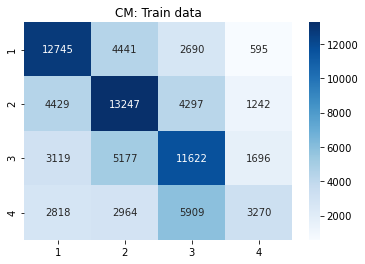

In [122]:
get_predict_metrics(severity_under_train_for_val,train_prediction_linear_svm_under_pca)
plot_confusin_matrix(linear_svm_classifier_under,
                     accidents_attributes_scaled_under_train_pca, 
                     severity_under_train_for_val, 
                     title="CM: Train data")

Well from our result test and train we have un under performing class 4 the others are between 50% and 60% but still F1 macro average is bellow 50% so well of our best at the moment 71% for testing set.

### 5.G Gausian SVM with PCA and undersampling

Finaly we have reached the modeling with Gausian SVM since it took too much time with with the whole data set now we have hope that at least with PCA and undersampling we can get some results.

First we will try C = 0.01

In [123]:
svm_circles_gaussian = SVC(kernel = "rbf", C = 0.1,cache_size=4000)
start_time = time.time()
svm_circles_gaussian.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
time_for_train = (time.time() - start_time)
display_scores(svm_circles_gaussian, accidents_attributes_scaled_under_train_pca, severity_under_train_for_val, 
               accidents_attributes_scaled_under_val_pca, severity_under_test_for_val, time_for_train)

Train score: 0.5431031260512578
Test score: 0.539
Time Needed: 1146.1829617023468 secnods


Second C = 1

In [124]:
svm_circles_gaussian_2 = SVC(kernel = "rbf", C = 1,cache_size=4000)
start_time = time.time()
svm_circles_gaussian_2.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
time_for_train = (time.time() - start_time)
display_scores(svm_circles_gaussian_2, accidents_attributes_scaled_under_train_pca, severity_under_train_for_val, 
              accidents_attributes_scaled_under_val_pca, severity_under_test_for_val, time_for_train)

Train score: 0.5999800650378141
Test score: 0.5762
Time Needed: 1458.9660034179688 secnods


And finally C = 10

In [125]:
svm_circles_gaussian_3 = SVC(kernel = "rbf", C = 10,cache_size=4000)
start_time = time.time()
svm_circles_gaussian_3.fit(accidents_attributes_scaled_under_train_pca, severity_under_train_for_val)
time_for_train = (time.time() - start_time)
display_scores(svm_circles_gaussian_3, accidents_attributes_scaled_under_train_pca, severity_under_train_for_val, 
               accidents_attributes_scaled_under_val_pca, severity_under_test_for_val, time_for_train)

Train score: 0.6988699368310886
Test score: 0.586
Time Needed: 4296.087999343872 secnods


From The first results it seams C = 10 is the best model. So lets predict some result and see more metrics for them.

In [126]:
train_prediction_gausian_svm_under_pca = svm_circles_gaussian_3.predict(accidents_attributes_scaled_under_train_pca)
val_prediction_gausian_svm_under_pca = svm_circles_gaussian_3.predict(accidents_attributes_scaled_under_val_pca)

F1 macro score: 0.5689592525001603
F1 score: 0.5780255710393886
Accuracy: 0.586
Recall: 0.586
Precision: 0.5812012929262997

 clasification report:
               precision    recall  f1-score   support

           1       0.65      0.80      0.72      2550
           2       0.60      0.57      0.58      2893
           3       0.52      0.56      0.54      2693
           4       0.55      0.36      0.44      1864

    accuracy                           0.59     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.59      0.58     10000



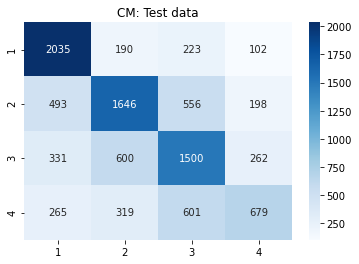

In [127]:
get_predict_metrics(severity_under_test_for_val,val_prediction_gausian_svm_under_pca)
plot_confusin_matrix(svm_circles_gaussian_3,
                     accidents_attributes_scaled_under_val_pca, 
                     severity_under_test_for_val, 
                     title="CM: Test data")

F1 macro score: 0.6895786586441078
F1 score: 0.6944944030233382
Accuracy: 0.6988699368310886
Recall: 0.6988699368310886
Precision: 0.702128956702565

 clasification report:
               precision    recall  f1-score   support

           1       0.72      0.87      0.79     20471
           2       0.72      0.68      0.70     23215
           3       0.64      0.68      0.66     21614
           4       0.75      0.52      0.62     14961

    accuracy                           0.70     80261
   macro avg       0.71      0.69      0.69     80261
weighted avg       0.70      0.70      0.69     80261



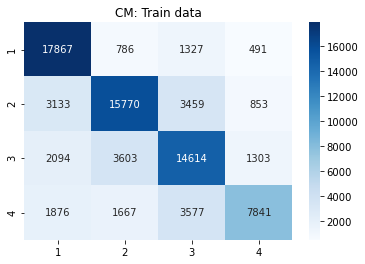

In [128]:
get_predict_metrics(severity_under_train_for_val,train_prediction_gausian_svm_under_pca)
plot_confusin_matrix(svm_circles_gaussian_3,
                     accidents_attributes_scaled_under_train_pca, 
                     severity_under_train_for_val, 
                     title="CM: Train data")

We can conclude that **Gausian SVM is a lot better then a linear for this data** but again, lower than 71% our best result from random forest on the whole data set.

## 6 Test the best model

#### RandomForestClassifier(max_depth=41, n_estimators=40)

We have nothing more to do, than use the test data on our best model

F1 macro score: 0.7140262751945936
F1 score: 0.8165557313885627
Accuracy: 0.82715
Recall: 0.82715
Precision: 0.8201467321332159

 clasification report:
               precision    recall  f1-score   support

           1       0.83      0.63      0.72      1022
           2       0.85      0.95      0.89     14038
           3       0.72      0.54      0.62      4193
           4       0.84      0.50      0.63       747

    accuracy                           0.83     20000
   macro avg       0.81      0.65      0.71     20000
weighted avg       0.82      0.83      0.82     20000



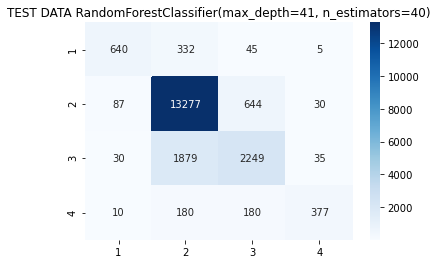

In [129]:
test_prediction_forest = forest_classifier.predict(accidents_attributes_scaled_test)
get_predict_metrics(severity_test,test_prediction_forest)
plot_confusin_matrix(forest_classifier,
                     accidents_attributes_scaled_test, 
                     severity_test, 
                     title="TEST DATA RandomForestClassifier(max_depth=41, n_estimators=40)")

## 7 Conclusion

From the test data we have same results as the validation data for Accidents Severety, the **model predicts 81%** of the data corectly if the data is weighted, that mean if new data comes at rate as our destribution and our target was **80%** corect classification.

#### Is that mean we have reached our goal ?

**No** we have not why, **there is NO guarantie that the Road Accidents will contiune happen in rate as our distribution** maybe if measures are tooked Accidents of Severity 2 will lower and so on, there can be many reasons.
In the end our result fom the best model is **71% correct Classifiation for every new car accident**

#### Did we fail? 

Answer is yes if we just look the 4/5 correct goal we have set for ourselfs, but we dont know, we extracted the best to our ability at the moment, maybe the data is not enough if we had better hardware and we could train it with 3500000 samples insted of 500000 could had higher prediction rate, maybe the data can not be well separated at all, because it is practiling inserted manualy by people with everyones bias at hand to classify the accident severity and 4 classes are not enought maybe they need to be more.**

One thing is for sure, we did a nice work **7/10 of the samples can be classified Corectly. If a model can be deploid, it can learn from itself and get with time better and better results, which must be used for better decisions regarding road safety, because deaths of 1.35 million / year are too much and something must be done.**

## 8. References

1. US Accidents (3.5 million records) A Countrywide Traffic Accident Dataset (2016 - 2020)- Sobhan Moosavi https://www.kaggle.com/sobhanmoosavi/us-accidents
2. US-Accidents: A Countrywide Traffic Accident Dataset - Sobhan Moosavi - https://smoosavi.org/datasets/us_accidents
3. L1 and L2 Regularization Methods - Anuja Nagpal
 https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
4. Resampling strategies for imbalanced datasets - Rafael Alencar https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
5. Multi-class Classification by Decision Tree - gizemt  https://www.kaggle.com/gizemtanriver/multi-class-classification-by-decision-tree
6. Multi-Class Metrics Made Simple - Boaz Shmueli https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [130]:
print(f"Total time for Notebook: {round((time.time() - start_time_total)/3600, 2)} h.")

Total time for Notebook: 5.18 h.
